In [763]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sn

1. Učitavanje podataka

•  Korak 1.1: Učitajte dataset pomoću Pythona koristeći biblioteku pandas.

•  Korak 1.2: Pregledajte osnovne informacije o datasetu:

• Broj redaka i stupaca (što redovi i stupci predstavljaju).

• Provjerite tipove podataka u datasetu (numerički, kategorijski).

• Identificirajte ima li dataset nedostajuće vrijednosti koristeći isnull()s


In [764]:
data = pd.read_csv('sample_data/Housing.csv')
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [765]:
data.shape

(545, 13)

Broj redaka je 545, a stupaca 13.

Retci predstavljaju uzorke tj. primjere, a stupci različite značajke.

In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


int64 su cjelobrojne numeričke varijable, a object su kategoričke varijable.

In [767]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Nema nedostajućih vrijednosti.

2. Opisna analiza podataka

• Korak 2.1: Prikazati osnovne statistike za sve varijable:

o Srednju vrijednost, medijan, standardnu devijaciju, minimalnu i maksimalnu
vrijednost.

• Korak 2.2:Vizualizirati odnose među značajkama i ciljnom varijablom (scatter plotovi,
korelacijski grafovi).

• Korak 2.3: Napraviti grafički prikaz i interpretirati razdiobe pojedinačnih varijabli i
njihove međusobne zavisnosti. To nam daje dobar uvid u sadržaj skupa podataka i
međusobni odnos varijabli. Možemo koristiti funkciju pairplot() iz biblioteke seaborn.

In [768]:
columns = ['price','area','bedrooms','bathrooms','stories','parking']
for column in columns:
  print(column)
  print("Mean:")
  print(data[column].mean())
  print("Median:")
  print(data[column].median())
  print("Standard Deviation:")
  print(data[column].std())
  print("Minimum:")
  print(data[column].min())
  print("Maxixmum:")
  print(data[column].max())

price
Mean:
4766729.247706422
Median:
4340000.0
Standard Deviation:
1870439.615657394
Minimum:
1750000
Maxixmum:
13300000
area
Mean:
5150.54128440367
Median:
4600.0
Standard Deviation:
2170.141022508803
Minimum:
1650
Maxixmum:
16200
bedrooms
Mean:
2.9651376146788992
Median:
3.0
Standard Deviation:
0.738063860568575
Minimum:
1
Maxixmum:
6
bathrooms
Mean:
1.2862385321100918
Median:
1.0
Standard Deviation:
0.502469616053218
Minimum:
1
Maxixmum:
4
stories
Mean:
1.8055045871559634
Median:
2.0
Standard Deviation:
0.8674924629255298
Minimum:
1
Maxixmum:
4
parking
Mean:
0.6935779816513762
Median:
0.0
Standard Deviation:
0.8615857504605449
Minimum:
0
Maxixmum:
3


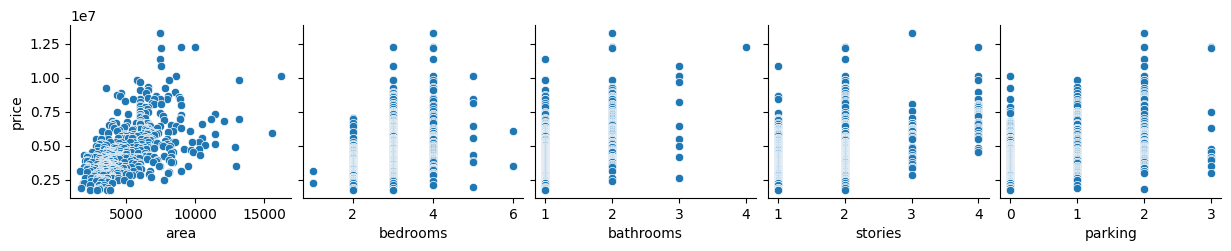

In [769]:
sns.pairplot(data, x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], y_vars='price', kind='scatter')
plt.show()


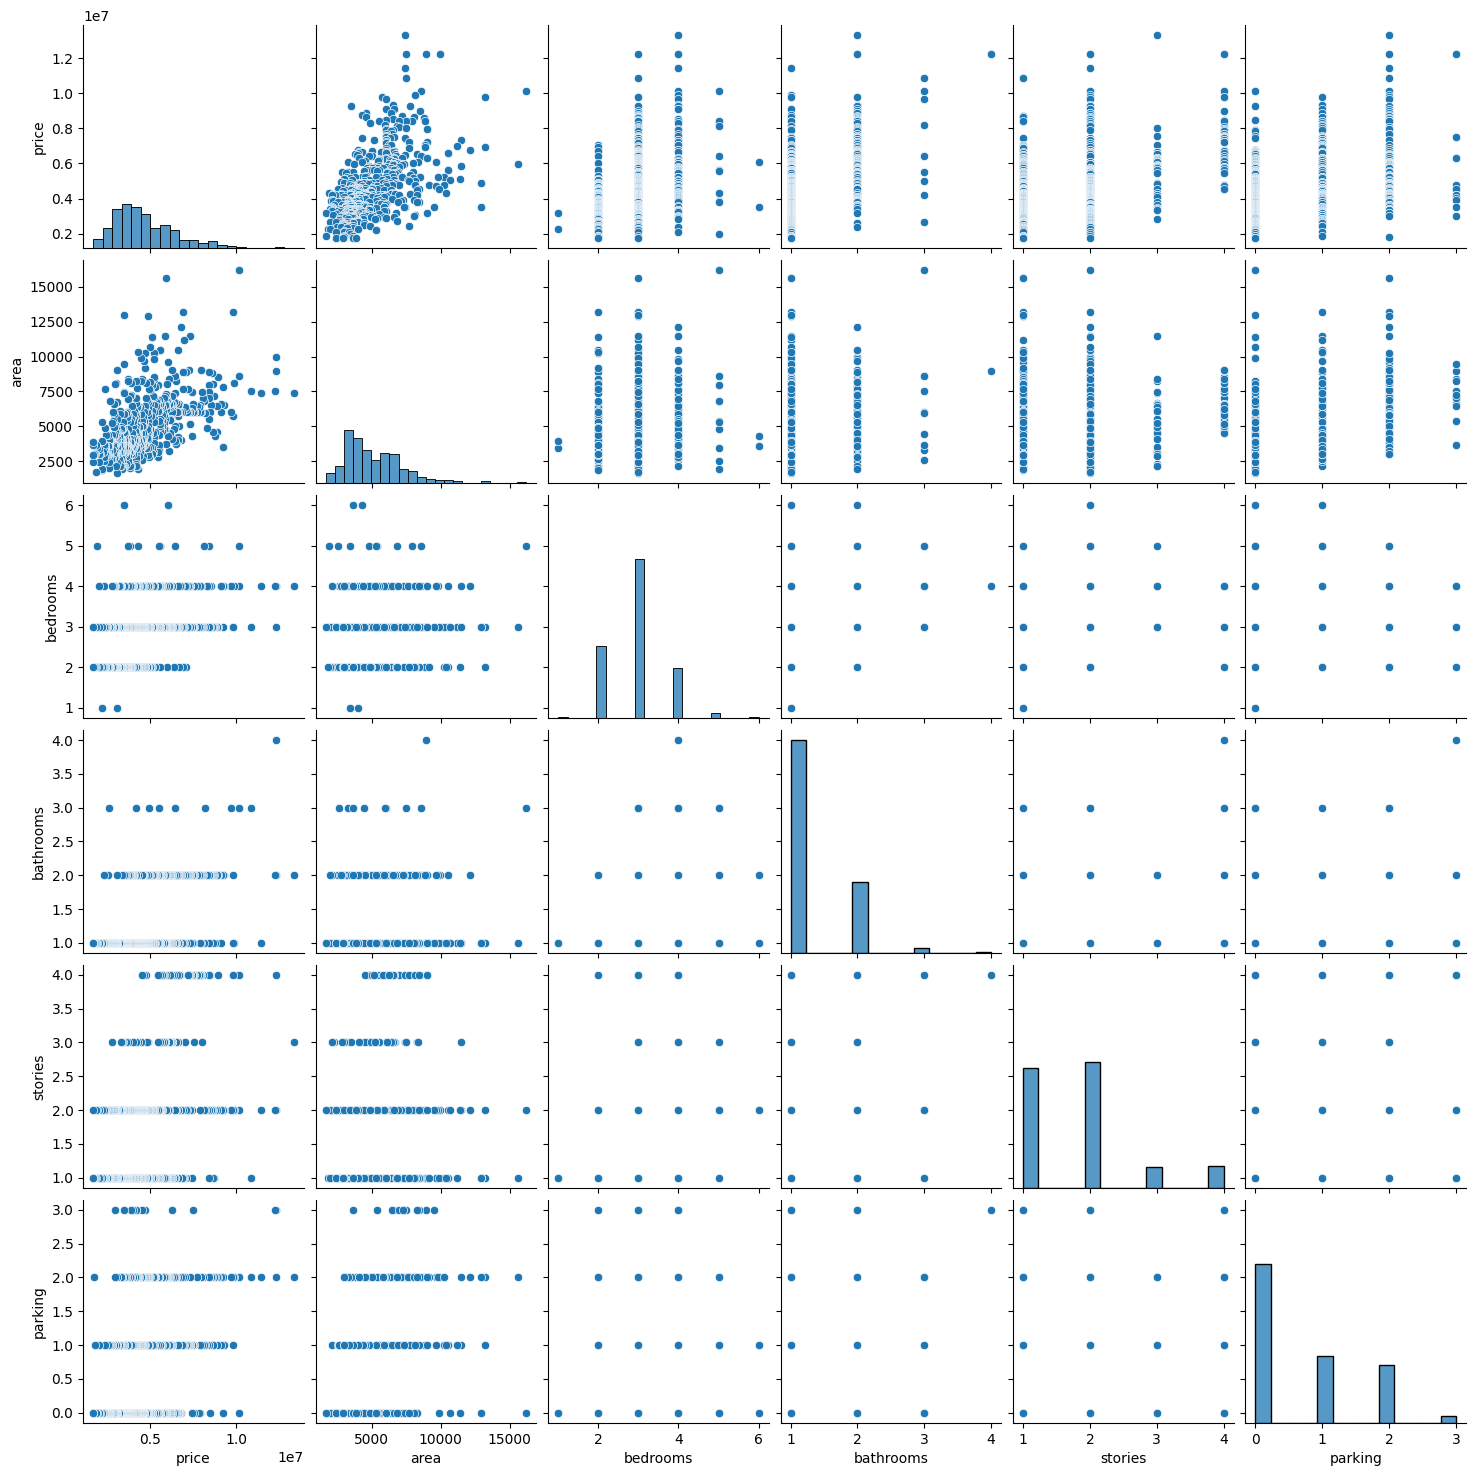

In [770]:
sns.pairplot(data)
plt.show()

3. Priprema podataka

• Korak 3.1: Pretvaranje kategorijskih varijabli u numerički format:

o Koristite One-Hot Encoding za značajke s više kategorija.

o Koristite Label Encoding za binarne kategorijske značajke.

• Korak 3.2: Identificirajte i uklonite značajke s velikom multikolinearnošću (ako
postoje):

o Izračunajte korelacijske koeficijente među varijablama i interpretirati koji bi bile najbolje
koristiti u modelu

o Koristite Variance Inflation Factor (VIF) kako biste detektirali redundantne
varijable.

• Korak 3.3: Normalizacija ili standardizacija numeričkih značajki (ako je potrebno):

o Primijenite tehniku standardizacije (npr., StandardScaler iz sklearn) na numeričke
varijable.

In [771]:
data['mainroad'] = data['mainroad'].replace({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].replace({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].replace({'yes': 1, 'no': 0})
data['basement'] = data['basement'].replace({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].replace({'yes': 1, 'no': 0})
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=False)
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].replace({True: 1, False: 0})
data['furnishingstatus_furnished'] = data['furnishingstatus_furnished'].replace({True: 1, False: 0})
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].replace({True: 1, False: 0})


<ipython-input-771-ef0476393bed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['mainroad'] = data['mainroad'].replace({'yes': 1, 'no': 0})
<ipython-input-771-ef0476393bed>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1, 'no': 0})
<ipython-input-771-ef0476393bed>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [772]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

print(vif_data)


                            feature        VIF
0                             price   3.142696
1                              area   1.577405
2                          bedrooms   1.375924
3                         bathrooms   1.507858
4                           stories   1.615461
5                          mainroad   1.192105
6                         guestroom   1.224729
7                          basement   1.348160
8                   hotwaterheating   1.070329
9                   airconditioning   1.357268
10                          parking   1.264042
11                         prefarea   1.217848
12       furnishingstatus_furnished   8.576263
13  furnishingstatus_semi-furnished  12.404311
14     furnishingstatus_unfurnished   8.866124


In [773]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


In [774]:
data = data.drop(columns=['furnishingstatus_semi-furnished'])
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [775]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

print(vif_data)

                         feature        VIF
0                          price  23.590814
1                           area   9.954242
2                       bedrooms  15.778137
3                      bathrooms  11.086643
4                        stories   8.618317
5                       mainroad   6.990296
6                      guestroom   1.485255
7                       basement   2.056359
8                hotwaterheating   1.121598
9                airconditioning   1.970316
10                       parking   2.064207
11                      prefarea   1.579052
12    furnishingstatus_furnished   1.650652
13  furnishingstatus_unfurnished   1.703924


In [776]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.094086


In [777]:
data = data.drop(columns=['bedrooms'])

In [778]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

print(vif_data)

                         feature        VIF
0                          price  23.427024
1                           area   9.480131
2                      bathrooms   9.789270
3                        stories   7.188292
4                       mainroad   6.840797
5                      guestroom   1.476872
6                       basement   1.953718
7                hotwaterheating   1.121273
8                airconditioning   1.952234
9                        parking   2.064186
10                      prefarea   1.573740
11    furnishingstatus_furnished   1.645235
12  furnishingstatus_unfurnished   1.645447


In [779]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,-0.280587
area,0.535997,1.000000,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,-0.142278
bathrooms,0.517545,0.193820,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,-0.132107
stories,0.420712,0.083996,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.082972
mainroad,0.296898,0.288874,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,-0.133123
guestroom,0.255517,0.140297,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,-0.099023
basement,0.187057,0.047417,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,-0.117935
hotwaterheating,0.093073,-0.009229,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,-0.059194
airconditioning,0.452954,0.222393,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.094086
parking,0.384394,0.352980,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.131234,-0.165705


In [780]:
data = data.drop(columns=['mainroad'])

In [781]:
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

print(vif_data)

                         feature        VIF
0                          price  22.870266
1                           area   8.648143
2                      bathrooms   9.781063
3                        stories   6.901319
4                      guestroom   1.476345
5                       basement   1.939809
6                hotwaterheating   1.120576
7                airconditioning   1.928262
8                        parking   2.058109
9                       prefarea   1.569206
10    furnishingstatus_furnished   1.628419
11  furnishingstatus_unfurnished   1.613065


In [783]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data['area'] = scaler.fit_transform(data[['area']])
#data['bedrooms'] = scaler.fit_transform(data[['bedrooms']])
data['bathrooms'] = scaler.fit_transform(data[['bathrooms']])
data['parking'] = scaler.fit_transform(data[['parking']])
data['stories'] = scaler.fit_transform(data[['stories']])

4. Postavljanje višestruke linearne regresije

• Korak 4.1: Definirajte ciljne i ulazne varijable (npr. X za značajke i y za ciljnu varijablu).

• Korak 4.2: Koristite biblioteku statsmodels za kreiranje modela višestruke linearne regresije:

o Importirajte funkciju OLS iz statsmodels.api.

o Postavite model i prikazujte rezultate korištenjem metode summary().

In [784]:
import statsmodels.api as sm

x = data.drop(columns='price')
y = data['price']

x = sm.add_constant(x)

result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.39e-122
Time:                        15:04:53   Log-Likelihood:                -8336.7
No. Observations:                 545   AIC:                         1.670e+04
Df Residuals:                     533   BIC:                         1.675e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

5. Analiza rezultata

• Interpretirajte koeficijente modela:

o Koje značajke imaju najveći utjecaj na ciljnu varijablu?

o Jesu li koeficijenti statistički značajni (p-vrijednost < 0.05)?

• Provjerite kvalitetu modela:

o Što znači R² (koeficijent determinacije)?

o Kako se model ponaša na temelju preostalih (rezidualnih) vrijednosti?

Najveći utjecaj na ciljnu varijablu imaju značajke area. stories i airconditioning.

Koeficijenti su uglavnom statistički značajni, osim za varijable guestroom i furnishingstatus_furnished

R2 tj. koeficijent determinacije je omjer varijance zavisne varijable koji je objašnjen nezavisnim varijablama. Vrijednost 0.616 za R2 nije najbolja i ukazuje na neoptimalan model.


6. Vizualizacija rezultata

• Prikazati stvarne vrijednosti ciljne varijable naspram predviđenih vrijednosti (koristite scatter
plot).

• Analizirati i interpretirati rezidualne vrijednosti i prikazati ih grafički.

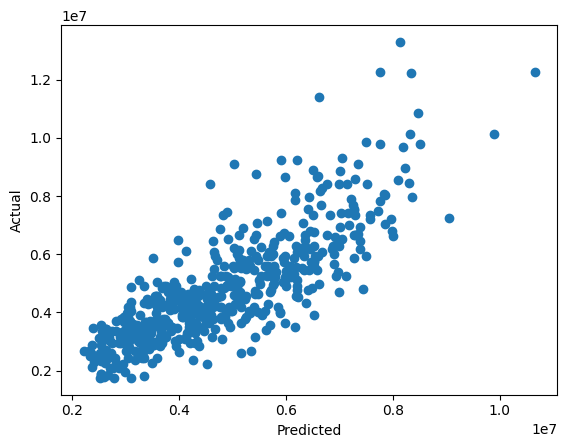

In [785]:
y_pred = result.predict(x)
plt.scatter(y_pred, y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

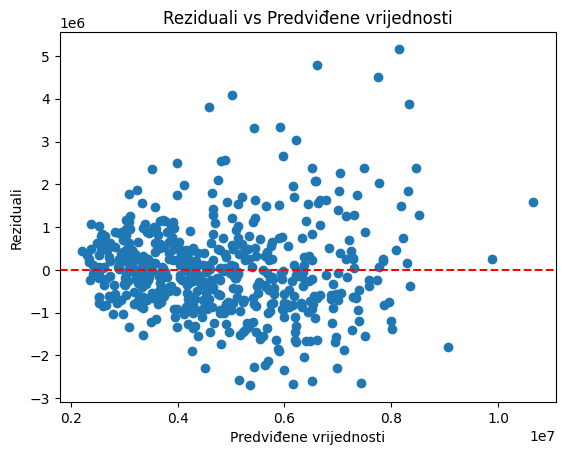

In [786]:
residual_values = result.resid
residual_values
plt.scatter(y_pred, residual_values)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.show()